In [1]:
from heapq import heappush, heappop


class Dynpq(object):
    '''Implementation of a dynamic priority queue. 
    push(): if task is already in the queue, its time is updated. 
    pop() returns the time, task having the least time. 
    The first one entered is the first to be returned in case of a tie.
    '''
    
    def __init__(self):
        self.pq = []
        self.ef = {}
        self.count = 0
        
    def push(self, time, task):
        if task != None:
            if task in self.ef:
                self.remove(task)
            self.count = self.count + 1
            entry = [time, self.count, task]
            self.ef[task] = entry
            heappush(self.pq, entry)
            
    def remove(self, task):
        if task in self.ef:
            entry = self.ef.pop(task)
            entry[-1] = 'REMOVED'
            
    def pop(self):
        while self.pq:
            time, count, task = heappop(self.pq)
            if task != 'REMOVED':
                del self.ef[task]
                return (time, task)
        raise KeyError ('pop from an empty priority queue')
        
if __name__ == '__main__':
    dynpq = Dynpq()
    dynpq.push('06:00', 'wake')
    dynpq.push('07:00', 'eat')
    dynpq.push('10:30', 'exercise')
    dynpq.push('11:00', 'shower')
    dynpq.remove('exercise')
    dynpq.push('07:30', 'work')
    dynpq.push('10:00', 'shower')
    print (dynpq.pop())
    dynpq.remove('wake')
    dynpq.push('12:00', 'eat')
    dynpq.push('10:45', 'leave')
    print (dynpq.pop())
    print (dynpq.pop())
    print (dynpq.pop())
    print (dynpq.pop())

('06:00', 'wake')
('07:30', 'work')
('10:00', 'shower')
('10:45', 'leave')
('12:00', 'eat')


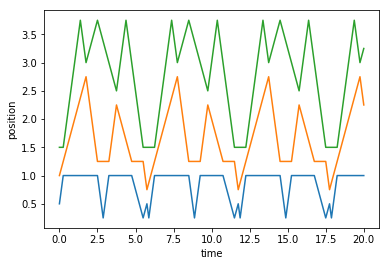

In [3]:
def trajectory(x, v, tend):
    '''The function returns the trajectories of hard spheres of diameter 0.25 and identical mass colliding in one dimension. 
    Input initial positions, corresponding velocities and time duration.
    '''
    N = len(x)
    for n in range(1, N):
        if x[n] <= x[n-1] + 0.25: raise ValueError
    v[0] = v[-1] = 0
    pq = Dynpq()
    traj = [[(0.0, x[0])]]
    for i in range(N-1):
        traj.append([(0.0, x[i+1])])
        if (v[i+1] - v[i]) < 0:
            pq.push((x[i+1]-x[i] - 0.25)/(v[i]-v[i+1]), i)
    told = 0
    tnew, num = pq.pop()
    while tnew < tend:
        for i in range(N):
            x[i] = x[i]+v[i]*(tnew-told)
        traj[num].append((tnew, x[num]))
        traj[num+1].append((tnew, x[num+1]))
        if num == 0:
            v[num+1] = -v[num+1]
        elif num == N-2:
            v[num] = -v[num]
        else:
            v[num], v[num+1] = v[num+1], v[num]
        told = tnew
        if num != N-2:
            if (v[num+2]-v[num+1])<0:
                pq.push(told+(x[num+2]-x[num+1]-0.25)/(v[num+1]-v[num+2]), num+1)
        if num != 0:
            if (v[num]-v[num-1])<0:
                pq.push(told+(x[num]-x[num-1]-0.25)/(v[num-1]-v[num]),num-1)
        tnew, num = pq.pop()
    for i in range(N):
        x[i] = x[i]+v[i]*(tend-told)
        traj[i].append((tend, x[i]))
    return traj
        

if __name__ == '__main__':
    #test 1
    x = [0., 0.5, 1., 1.5, 4.]
    v = [0., 2., 1., 0., 0.]; tend = 20.
    traj = trajectory(x, v, tend)
    from pylab import plot, xlabel, ylabel, savefig, close
    for i in [1, 2, 3]:
        t = [t_x[0] for t_x in traj[i]]
        x = [t_x[1] for t_x in traj[i]]
        plot(t, x)
        xlabel('time')
        ylabel('position')
#    savefig('threespheres.png')
#    close()


time = 0.13968586921691895
time = 0.4961233139038086


Text(0,0.5,'position')

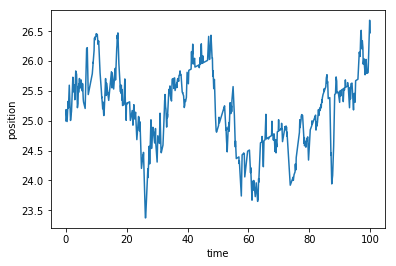

In [4]:
    #test 2
    from random import gauss
    from time import time
    for N in [51, 101]:
        x = [0.5*j for j in range(N)]
        v = [gauss(0., 1.) for j in range(N)]
        tend = 100.
        t0 = time()
        traj = trajectory(x, v, tend)
        t1 = time()
        print ('time =', t1-t0)
    t = [t_x[0] for t_x in traj[50]]
    x = [t_x[1] for t_x in traj[50]]
    plot(t, x)
    xlabel('time')
    ylabel('position')
#    savefig('99spheres.png')
#    close()
